**Advanced Task 2 - Next Word Prediction**

***Author - Ritika Roy Chowdhury***

Importing required packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

Loading Data and printing first and last line

In [ ]:
file = open("/content/1661-0.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

The Last Line:  subscribe to our email newsletter to hear about new eBooks.


Cleaning the data:

Replacing \n, \r and \ufeff with ' ' 

In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net   Title: The Adventures of Sherlo"

Mapping punctuation to space

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'Project Gutenberg s The Adventures of Sherlock Holmes  by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   You may copy it  give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg net   Title  The Adventures of Sherlock Holmes  Author  Arthur Conan Doyle  Release Date  November 29  2002  EBook  1661  Last Updated  May 20  2019  Language  English  Characte'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use anyone anywhere at no cost and with almost restrictions whatsoever. You may copy it, give it away or re-use under terms Gutenberg License included this online www.gutenberg.net Title: Holmes Author: Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set encoding: UTF-8 *** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES SHERLOCK HOLMES Prod"

Tokenization

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[838, 3083, 56, 322, 57, 1523, 15, 95, 839, 3084]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8931


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  17678


array([[ 838, 3083],
       [3083,   56],
       [  56,  322],
       [ 322,   57],
       [  57, 1523],
       [1523,   15],
       [  15,   95],
       [  95,  839],
       [ 839, 3084],
       [3084, 3085]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 838 3083   56  322   57]
The responses are:  [3083   56  322   57 1523]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Creating the Model:

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             89310     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8931)              8939931   
                                                                 
Total params: 22,078,241
Trainable params: 22,078,241
Non-trainable params: 0
_________________________________________________________________


Plotting the model:

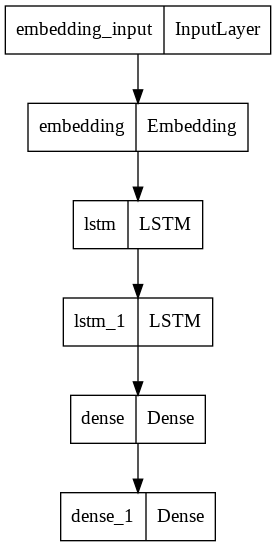

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

Callbacks:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

Compile the model:

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fit the model:

In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
277/277 [==============================] - ETA: 0s - loss: 8.8784
Epoch 00001: loss improved from inf to 8.87836, saving model to nextword1.h5
277/277 [==============================] - 86s 280ms/step - loss: 8.8784 - lr: 0.0010
Epoch 2/150
277/277 [==============================] - ETA: 0s - loss: 8.3595
Epoch 00002: loss improved from 8.87836 to 8.35950, saving model to nextword1.h5
277/277 [==============================] - 76s 275ms/step - loss: 8.3595 - lr: 0.0010
Epoch 3/150
277/277 [==============================] - ETA: 0s - loss: 8.0921
Epoch 00003: loss improved from 8.35950 to 8.09214, saving model to nextword1.h5
277/277 [==============================] - 76s 274ms/step - loss: 8.0921 - lr: 0.0010
Epoch 4/150
277/277 [==============================] - ETA: 0s - loss: 7.8711
Epoch 00004: loss improved from 8.09214 to 7.87114, saving model to nextword1.h5
277/277 [==============================] - 76s 275ms/step - loss: 7.8711 - lr: 0.0010
Epoch 5/150
277/277 [===

Graph:

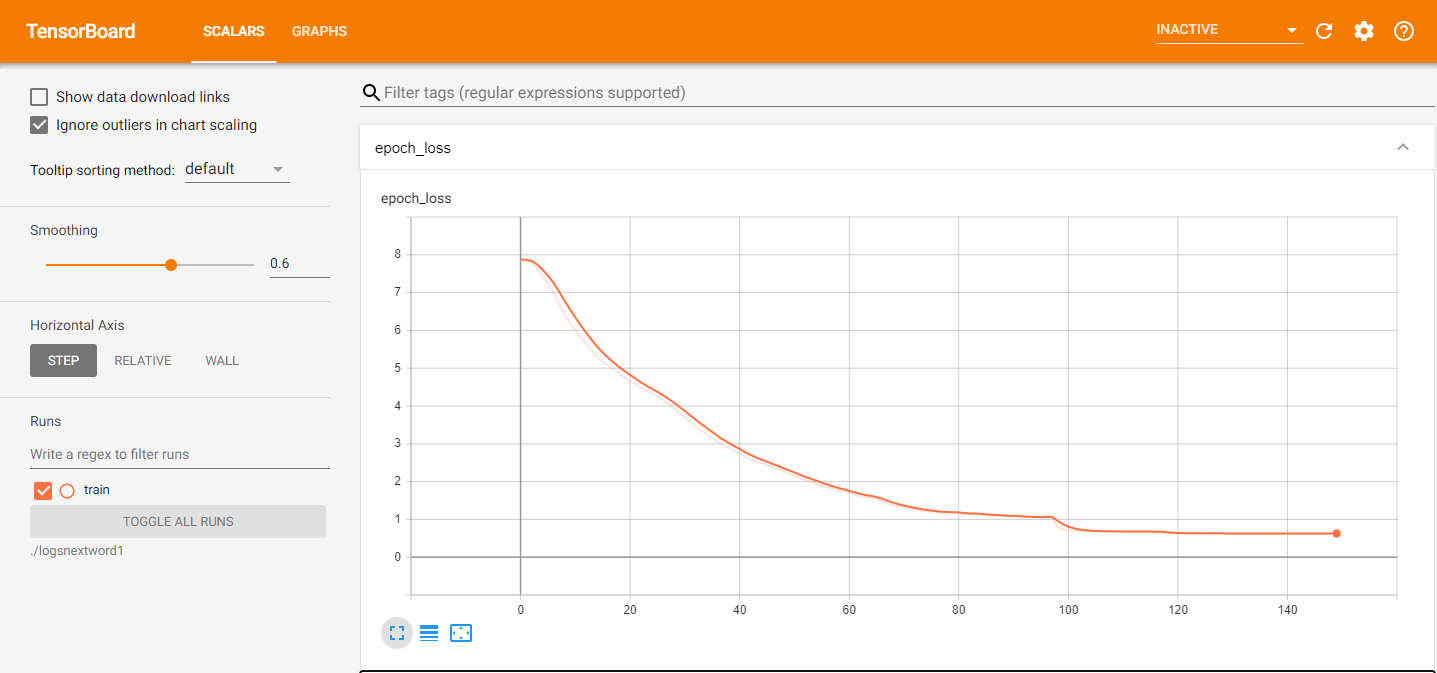

In [1]:
from IPython.display import Image 
pil_img = Image(filename='/content/graph1.png')
display(pil_img)

***Observation:***
We are able to develop a decent next word prediction model and are able to get a declining loss and an overall decent performance.

**Thank You**